# FigureS7: DevMel supplementals
A)	Probability scores from DevMel logit test for normal melanocyte McSC, Fetal, Neo, Adult
B)	Prbabiluity scores from DevMel logit test for melanoma groups McSC, Fetal, Neo, Adult
C)	Fraction of each devMel category for each tumor, using hexcodes.

In [1]:
%%capture

# settings
wkdir, s3dir = '/home/ubuntu/data/DL20181011_melanocyte_test_data', 'daniel.le-work/MEL_project'

%reload_ext autoreload
%autoreload 2
from scanpy_helpers_1 import *
from scanpy_helpers_2 import *
warnings.filterwarnings('ignore')
%matplotlib inline

# import data from s3
for file in ['raw_adata', 
             'full_adata',
             'DE_df',
            ]:
#     ! aws s3 cp s3://{s3dir}/{file}.p {wkdir}/
    var = pickle.load((open(f'{wkdir}/{file}.p', 'rb')))
    exec(f'{file} = var')
    del var
    
usable_cores = multiprocessing.cpu_count()-1

# update subtypes
full_adata.obs['subtypes'] = ['follicular' if x in ['light_foll_mel', 'dark_foll_mel', 'cyc_foll_mel'] \
                         else y \
                         for x,y in zip(full_adata.obs.class_1, full_adata.obs.subtypes)]

# label order
dev_stage_order = ['fet','neo','adt']
subtypes_order = ['cutaneous','acral','foreskin','follicular']
acral_subtype_order = ['acral','not_acral']
foreskin_subtype_order = ['foreskin','not_foreskin']
follicular_subtype_order = ['follicular','not_follicular']
dev_subtype_order = ['fet_acral','fet_cutaneous','fet_follicular','neo_foreskin','adt_acral','adt_cutaneous']

# create class_2 for site granularity
full_adata.obs['class_2'] = [x if x not in ['mel'] \
                             else f'{y}_mel'
                             for x,y in zip(full_adata.obs['class_1'], full_adata.obs['subtypes'])]

# create class_3 for site+dev_stage granularity
full_adata.obs['class_3'] = [x if not x.endswith('_mel') or x.startswith('cyc_') \
                             else f'{y}_{x}'
                             for x,y in zip(full_adata.obs['class_2'], full_adata.obs['dev_stage'])]

# update class_1 to pool by cell type
full_adata.obs['class_1'] = [x if not x.endswith('_mel') \
                             else 'mel' if not x.startswith('cyc_') \
                             else 'cyc_mel' \
                             for x in full_adata.obs['class_1']]
type_order_1 = ['mel',
                'cyc_mel',
                'krt',
                'cyc_krt',
                'eccrine',
                'cyc_eccrine',
                'dendritic',
                'cyc_dendritic',
                'mast',
                'T_cell',]
    
DE_df['class_1'] = (DE_df['class_1']
                      .astype(str)
                      .astype(CategoricalDtype(type_order_1, ordered=True))
                     )
DE_df = DE_df.dropna()

type_order_2 = ['light_foll_mel',
                'dark_foll_mel',
                'foreskin_mel',
                'acral_mel',
                'cutaneous_mel',
                'cyc_foll_mel',
                'cyc_mel',
                'krt',
                'cyc_krt',
                'eccrine',
                'cyc_eccrine',
                'dendritic',
                'cyc_dendritic',
                'mast',
                'T_cell',]

type_order_3 = ['adt_cutaneous_mel',
                'adt_acral_mel',
                'neo_foreskin_mel',
                'fet_cutaneous_mel',
                'fet_acral_mel',
                'fet_dark_foll_mel',
                'fet_light_foll_mel',][::-1] + \
                ['cyc_mel',
                'cyc_foll_mel',
                'krt',
                'cyc_krt',
                'eccrine',
                'cyc_eccrine',
                'dendritic',
                'cyc_dendritic',
                'mast',
                'T_cell',]

color_code_dict = {'dendritic':'#b99abf',
                   'cyc_dendritic':'#9abfb9',
                   'eccrine':'#CBB7E3',
                   'cyc_eccrine':'#b7e3cb',
                   'krt':'#E9E1F2',
                   'cyc_krt':'#e1f2e9',
                   'mast':'#AE90C2',
                   'T_cell':'#5F3D68',
                   'mel':'#000000',
                   'cyc_mel':'#999999',
                   'cutaneous_mel':'#FF0000',
                   'cutaneous':'#FF0000',
                   'leg':'#FF0000',
                   'arm':'#FF0000',
                   'acral_mel':'#0000FF',
                   'acral':'#0000FF',
                   'palm':'#0000FF',
                   'sole':'#0000FF',
                   'foreskin_mel':'#FFA500',
                   'foreskin':'#FFA500',
                   'dark_foll_mel':'#003300',
                   'light_foll_mel':'#99cc99',
                   'follicular':'#008000',
                   'hair_follicle':'#008000',
                   'fet_cutaneous_mel':'#ff4c4c',
                   'adt_cutaneous_mel':'#b20000',
                   'shallow_regime':'#b20000',
                   'steep_regime':'#00b2b2',
                   'fet_acral_mel':'#4c4cff',
                   'adt_acral_mel':'#0000b2',
                   'neo_foreskin_mel':'#FFA500',
                   'fet_dark_foll_mel':'#003300',
                   'fet_light_foll_mel':'#99cc99',
                   'fet':'#dbc2a9',
                   'neo':'#c09569',
                   'adt':'#a5682a',
                   'NTRK2+/HPGD+':'#474747',
                   'NTRK2-/HPGD-':'#DDDDDD',
                   'NTRK2+/HPGD-':'#0000FF',
                   'NTRK2-/HPGD+':'#FF0000',
                   'black':'#000000',
                   'grey':'#D3D3D3',
                   'melanoma':'#935aff',
                   'mel':'#935aff',
                   'follicular_like':'#6514ff',
                   'adult_interfollicular':'#ff1439',
                   'follicular_low':'#ff1439',
                   'interfoll_mel':'#ff1439',
                   'neonatal_interfollicular':'#ffda14',
                   'fetal_interfollicular':'#1439ff',
                   'fetal_follicular':'#39ff14',
                   'follicular_high':'#39ff14',
                   'light_foll_mel':'#39ff14',
                   'dark_foll_mel':'#93ba8b',
                   'norm':'#000000',
                   'cluster_1':'#ff1439',
                   'cluster_0':'#ffda14',
                   'cluster_2':'#39ff14',
                  }
heatmap_cmap = 'jet'

In [2]:
print('computing...')
groupby = 'dev_stage'
grouped_dict = {'fet_light_foll_mel':'0',
                'fet_dark_foll_mel':'0',
#                 'fet_acral_mel':'1',
                'fet_cutaneous_mel':'1',
                'neo_foreskin_mel':'2',
#                 'adt_acral_mel':'3',
                'adt_cutaneous_mel':'3',
               }
targets = sorted(list(set(grouped_dict.values())))

target_dict = {
                '0':'fetal_follicular',
               '1':'fetal_interfollicular',
               '2':'neonatal_interfollicular',
               '3':'adult_interfollicular',
              }

###############

# # original Tirosh data
# sc_mel_df = pd.read_csv('/home/ubuntu/data/DL20181011_melanocyte_test_data/cancer_ext_data/GSE72056_melanoma_single_cell_revised_v2.txt',
#            sep = '\t')

# sc_mel_counts = (sc_mel_df.iloc[3:,:]
#                  .rename(columns = {'Cell':'gene'})
#                  .set_index('gene')
#                  .T
#                 )
# # add patient annotations
# sc_mel_counts['cancer_patient'] = ['mel_{}'.format(int(x)) for x in sc_mel_df.iloc[0,1:]]
# # remove non-malignant cells
# sc_mel_counts = sc_mel_counts[sc_mel_df.iloc[1,1:] == 2]
# # remove duplicate genes
# sc_mel_counts = (sc_mel_counts
#                  .iloc[:,~sc_mel_counts.columns.duplicated(keep = 'first')]
#                 )

# # filter based on Fig1C constituents from paper
# # mel_cell_id = [53,58,60,72,74,78,79,80,81,82,84,88,89,94]
# # filter based on AXL-MITF scatter figure
# mel_cell_id = [53,81,82,79,80,59,84,78,88,71]
# sc_mel_counts = sc_mel_counts[[int(x.split('_')[1]) in mel_cell_id for x in sc_mel_counts.cancer_patient]]

###############

# newer melanoma dataset
mel_anno_df2 = pd.read_csv('s3://daniel.le-work/MEL_project/tumors.mal_tsne_anno.txt', 
                           sep = '\t', index_col = 0)
mel_anno_df2 = mel_anno_df2.iloc[1:,:]

mel_df2 = pd.read_csv('s3://daniel.le-work/MEL_project/tumors_tpm.txt', sep = '\t', index_col = 0).T
mel_df2_fltrd = pd.merge(mel_df2.reset_index().rename(columns={'GENE':'index'}),
                         mel_anno_df2.reset_index().rename(columns={'NAME':'index'}).loc[:,['index','tumor']],
                         'right',
                         'index')
mel_df2_fltrd = (mel_df2_fltrd
                 .set_index('index')
                 .rename(columns = {'tumor':'cancer_patient'})
                )
mel_df2_fltrd['cancer_patient'] = ['mel_{}'.format(x.split('Mel')[-1]) for x in mel_df2_fltrd.cancer_patient]
mel_df2_fltrd = (mel_df2_fltrd
                .iloc[:,~mel_df2_fltrd.columns.duplicated(keep = 'first')])

# remove samples from original Tirosh paper
# mel_df2_fltrd = mel_df2_fltrd[[x not in [f'mel_{y}' for y in mel_cell_id] for x in mel_df2_fltrd.cancer_patient]]

# intersect of gene names
# mel_df2_fltrd = mel_df2_fltrd.loc[:,list(set(mel_df2_fltrd.columns) & set(sc_mel_counts.columns))]

###############

# merge two datasets
sc_mel_counts = mel_df2_fltrd
# sc_mel_counts = sc_mel_counts.append(mel_df2_fltrd)
sc_mel_counts = sc_mel_counts.dropna(axis = 1)

patient_values = sc_mel_counts['cancer_patient'].values.tolist()
cell_id = sc_mel_counts.index.tolist()


### append module scores to input_adata
for input_adata in [full_adata]:
    program_df = pd.read_csv('s3://daniel.le-work/MEL_project/axl_mitf_genes.csv')
    AXL_module = [x for x in program_df.axl_program.tolist() if x in input_adata.var_names.tolist()]
    MITF_module = [x for x in program_df.mitf_program.tolist() if x in input_adata.var_names.tolist()]

    modules_dict = {'AXL_module':AXL_module,
                    'MITF_module':MITF_module,
                   }

    input_adata.obs['cell'] = input_adata.obs.index.tolist()
    input_adata.obs['cell'] = (input_adata
                              .obs['cell']
                              .astype(str)
                              .astype(CategoricalDtype(input_adata.obs['cell'].tolist())))
    cat, exp_df = prepare_dataframe(input_adata,
                     var_names = input_adata.var_names,
                     groupby = 'cell')
    exp_df = exp_df.rank(pct=True, axis=1, method = 'min') # ranked expression per cell

    for key,value in modules_dict.items():
        input_adata.obs[key] = exp_df.loc[:,value].mean(axis=1)

    input_adata.obs['AXL_MITF'] = input_adata.obs['AXL_module']/input_adata.obs['MITF_module']


computing...


In [3]:
print('computing...')

# grouped labels
groupby='class_3'
targets = [x for x in range(4)]
input_adata = full_adata
input_adata = input_adata[[x in grouped_dict.keys() for x in input_adata.obs[groupby]]]
input_adata.obs['group'] = [int(grouped_dict.get(x)) for x in input_adata.obs[groupby]]


# enforce class balance
sample_n = 500
cancer_genes = sc_mel_counts.drop('cancer_patient', axis = 1).columns.tolist()
target_genes = (input_adata.var['highly_variable']
                .index[input_adata.var['highly_variable']]
                .tolist()
               )
gene_order = list(set(target_genes) & set(cancer_genes))
cat, pred = prepare_dataframe(input_adata,
                              gene_order,
                              'cell'
                             )
pred['group'] = input_adata.obs['group'].values

# sample data
res_master = []
pred_master = pd.DataFrame()
for target in targets:
    input_slice = pred[pred['group'] == target]
    np.random.seed(seed=1)
    sample_idx = np.random.choice(len(input_slice), sample_n)
    res_slice = [target]*sample_n
    res_master = res_master + res_slice
            
    pred_slice = (input_slice
                  .loc[:,gene_order]
                  .iloc[sample_idx,:]
                 )
    pred_master = pred_master.append(pred_slice)
    
pred = pred_master.values
# scale data using sum of norm and cancer
scaler = StandardScaler()
## import melanoma data from scaler
data = sc_mel_counts.loc[:,gene_order].values
idx = np.random.randint(len(pred), size=len(data))
combo_data = np.concatenate((pred[idx,:], data), axis = 0)
norm_scaler = scaler.fit(combo_data)

## overwrite with scaled data
pred = norm_scaler.transform(pred)

label_dict = {}
for idx,x in enumerate(targets):
    label_dict[x] = idx
res = np.array(res_master)
res = res.reshape(-1,1)

# train
X_train, X_test, y_train, y_test = train_test_split(pred,
                                                    res,
                                                    test_size=0.33, 
                                                    random_state=0)

# logistic regression
l1_ratio = 0.5
C = 0.005
clf = LogisticRegression(C = C,
                         multi_class='auto', 
                         penalty = 'elasticnet', 
                         solver = 'saga',
                         l1_ratio=l1_ratio,
                         random_state=0
                        ) 
clf.fit(X_train, y_train)
# extract coefs
coef_clf = clf.coef_.ravel()
sparsity = np.mean(coef_clf == 0)
print('Sparsity with Elastic-Net penalty:', sparsity)
print('\n')

# extract non-zero coefficient genes
coef_reshape = clf.coef_
logit_var_df = pd.DataFrame()
for x in [int(x) for x in targets]:
    print('label:', target_dict.get(str(x)))
    idx = coef_reshape[x,:]
    coef_vals = idx.tolist()
    idx = np.nonzero(idx)
    idx = idx[0].tolist()
    geneoi = [gene_order[x] for x in idx]
    coef_val = [coef_vals[x] for x in idx]
    logit_var_slice = pd.DataFrame({'gene':geneoi,'coef':coef_val})
    logit_var_slice['label'] = x
    logit_var_df = logit_var_df.append(logit_var_slice)
    print([gene_order[x] for x in idx])
    print('\n')

# prdict and model performance report
for idx, test_set in enumerate([[X_test,y_test], [X_train, y_train]]):
    print(['test','train'][idx])
    y_pred = clf.predict(test_set[0])
    report_dict = classification_report(test_set[1], y_pred, 
                                          target_names=[target_dict.get(str(x)) for x in targets],
                                          output_dict =True
                                         )

    report_df = pd.DataFrame.from_dict(report_dict, orient='columns')
    report_df = (report_df
                 .loc[['precision','recall','f1-score','support'], :]
                 .loc[:,[target_dict.get(str(x)) for x in targets]]
                 .T
                 .round(2)
                )
    report_df['support'] = report_df['support'].astype(int)
    display(report_df)


computing...
Sparsity with Elastic-Net penalty: 0.9895304568527918


label: fetal_follicular
['GLI1', 'COL1A2', 'CPZ', 'LUM', 'COL5A1', 'TMEM132C', 'CD248', 'CCBE1', 'EDNRB', 'ID3', 'CXCL14', 'HIF3A', 'PDGFRB', 'DHRS3', 'ALX4', 'NREP', 'MFAP4', 'CLDN11', 'CYYR1', 'COL1A1', 'PLXDC2', 'LIX1', 'TBX15', 'TWIST2', 'MDK', 'FST', 'CACNA1G', 'RBP4', 'ITM2A', 'CRLF1', 'ROPN1B', 'OLFML3', 'CAPN3', 'THBD', 'PPAP2B', 'GMPR', 'COL21A1', 'GPC3', 'ACAN', 'FRZB', 'ADAMTSL1', 'EGFLAM', 'RAB38', 'ARHGAP29', 'SAT1', 'APOE', 'C2orf40', 'FBN1', 'COL16A1', 'TSPO', 'TIMP3', 'COL4A1', 'PCOLCE', 'LRP1', 'TPBG', 'SOX2', 'MGLL', 'THY1', 'AXL', 'COL3A1', 'CCND2', 'NNAT', 'SEMA3G', 'SLC7A8', 'CHCHD6', 'PRELP', 'OSR2', 'OAF', 'FBLN1', 'CXCR4', 'DCN', 'MEG3', 'EMID1', 'MXRA5', 'FBN2', 'QPCT', 'COL6A3', 'MEST']


label: fetal_interfollicular
['MCHR1', 'RAB3B', 'ITGB5', 'HLA-B', 'COL1A2', 'TMSB4X', 'LGALS3', 'APOD', 'CAPN12', 'SPTSSA', 'PTGDS', 'MIR221', 'METRN', 'ANK2', 'CTSK', 'FRAS1', 'MLLT4', 'SUSD3', 'PDLIM3', 'P

,precision,recall,f1-score,support
fetal_follicular,1.00,0.99,0.99,173
fetal_interfollicular,0.98,0.95,0.97,166
neonatal_interfollicular,0.96,1.00,0.98,165
adult_interfollicular,0.99,0.99,0.99,156


train


,precision,recall,f1-score,support
fetal_follicular,1.00,0.98,0.99,327
fetal_interfollicular,0.98,0.99,0.98,334
neonatal_interfollicular,0.98,1.00,0.99,335
adult_interfollicular,1.00,0.99,0.99,344


In [4]:
# create and export scmel adata for look up notebook
print(...)

# predict melanoma label
cancer_genes = sc_mel_counts.drop('cancer_patient', axis = 1).columns.tolist()
target_genes = (input_adata.var['highly_variable']
                .index[input_adata.var['highly_variable']]
                .tolist()
               )
gene_order = list(set(target_genes) & set(cancer_genes))

projection_df = pd.DataFrame()
results_df = pd.DataFrame()
# standard scale input data
data = sc_mel_counts.loc[:,gene_order].values
mel_cell_id = sc_mel_counts.index.values
mel_data = norm_scaler.transform(data)

input_df = pd.DataFrame(mel_data, columns = gene_order)
input_df['cancer_patient'] = sc_mel_counts['cancer_patient'].values 
input_df['cell'] = mel_cell_id

result = clf.predict(input_df.loc[:,gene_order].values).astype(int)
input_df['label'] = result

# extract axes
obs = sc_mel_counts.drop('cancer_patient', axis = 1).T.columns.tolist()
gene_names = sc_mel_counts.drop('cancer_patient', axis = 1).T.index.tolist()

# create ad obj
array_adata = sc_mel_counts.drop('cancer_patient', axis = 1).T.values
scmel_adata = ad.AnnData(X=array_adata).T
scmel_adata.X = sparse.csr_matrix(scmel_adata.X)
scmel_adata.var_names = gene_names
scmel_adata.obs_names = obs

# append metadata
scmel_adata.obs['label'] = input_df.label.tolist()
scmel_adata.obs['cancer_patient'] = input_df.cancer_patient.tolist()


Ellipsis


## devmel probabality distributions

Ellipsis


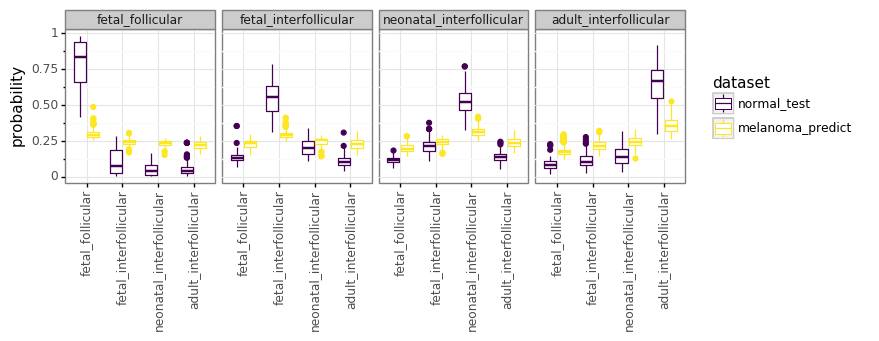

<ggplot: (8730211154415)>


In [5]:
print(...)
# probability variances
colnames = ['fetal_follicular',
           'fetal_interfollicular',
           'neonatal_interfollicular',
           'adult_interfollicular']
eval_dict = {'normal_test':X_test,
             'melanoma_predict':mel_data
            }
proba_grouped = pd.DataFrame()
for i in ['normal_test', 'melanoma_predict']:
    proba_df = pd.DataFrame(clf.predict_proba(eval_dict.get(i)))
    proba_df.columns = colnames
    proba_df['max_val'] = proba_df.max(axis = 1)

    for x in colnames:
        proba_slice = (proba_df
                       .query(f'{x}==max_val')
                       .drop('max_val', axis=1)
                      )
        proba_slice['label'] = x
        proba_slice['dataset'] = i
        proba_grouped = proba_grouped.append(proba_slice)

proba_grouped_melt = pd.melt(proba_grouped, id_vars=['dataset','label'])
proba_grouped_melt['color'] = [x==y for x,y in zip(proba_grouped_melt['label'], proba_grouped_melt['variable'])]
proba_grouped_melt['dataset'] = (proba_grouped_melt['dataset']
                            .astype(str)
                            .astype(CategoricalDtype(['normal_test', 'melanoma_predict'],
                                                     ordered=True
                                                    ))
                           )
proba_grouped_melt['label'] = (proba_grouped_melt['label']
                          .astype(str)
                          .astype(CategoricalDtype(['fetal_follicular',
                                                   'fetal_interfollicular',
                                                   'neonatal_interfollicular',
                                                   'adult_interfollicular'], 
                                                   ordered = True))
                         )
proba_grouped_melt['variable'] = (proba_grouped_melt['variable']
                          .astype(str)
                          .astype(CategoricalDtype(['fetal_follicular',
                                                   'fetal_interfollicular',
                                                   'neonatal_interfollicular',
                                                   'adult_interfollicular'], 
                                                   ordered = True))
                         )

plotnine.options.figure_size=(8,2)
plot = (ggplot(proba_grouped_melt)
        + theme_bw()
        + theme(axis_text_x = element_text(angle=90))
        + geom_boxplot(aes('variable','value',color='dataset'))
        + labs(x = '', y = 'probability')
        + facet_wrap('~label', ncol=4)
       )
print(plot)


## fraction of devmel labels by tumor biopsy

computing...


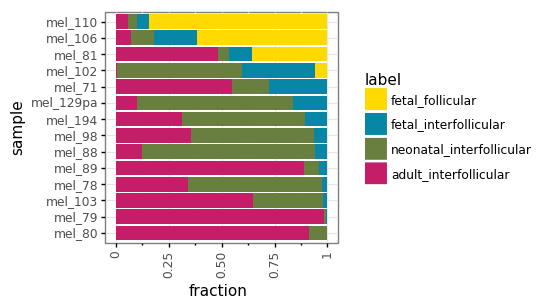

<ggplot: (8730211158406)>


In [7]:
# proportions of each predicted cell type

print('computing...')
projection_df = pd.DataFrame()
results_df = pd.DataFrame()
cell_id_df = pd.DataFrame()
# standard scale input data
data = sc_mel_counts.loc[:,gene_order].values
mel_cell_id = sc_mel_counts.index.values
mel_data = norm_scaler.transform(data)

input_df = pd.DataFrame(mel_data, columns = gene_order)
input_df['cancer_patient'] = sc_mel_counts['cancer_patient'].values 
input_df['cell'] = mel_cell_id
for sample in set(input_df.cancer_patient):
    df_slice = input_df[input_df.cancer_patient == sample]
    data_slice = (df_slice
                  .loc[:,gene_order]
                  .values)
    result = clf.predict(data_slice).astype(int)
    results_slice = (pd.DataFrame(result, columns=['count'])['count']
                     .value_counts()
                     .reset_index()
                     .rename(columns={'index':'label'})
                    )    
    results_slice = pd.merge(pd.DataFrame([int(x) for x in targets], columns=['label']), 
                          results_slice,
                          'left',
                          'label'
                         )
    results_slice = results_slice.replace(np.nan, 0)
    results_slice['fraction'] = [x/np.sum(results_slice['count'].values) for x in results_slice['count']]
    results_slice['sample'] = sample
    results_df = results_df.append(results_slice)
    
    # create cell_id slice with predictions
    cell_id_slice = pd.DataFrame(result, columns=['label'])
    cell_id_slice['cell'] = df_slice['cell'].values
    cell_id_slice['sample'] = sample
    cell_id_df = cell_id_df.append(cell_id_slice)
        
results_df['label'] = [target_dict.get(str(x)) for x in results_df['label']]
model_order = []
for label_val in target_dict.values():
    results_slice = results_df[results_df.label == label_val]
    results_slice = results_slice[[x not in model_order for x in results_slice['sample']]]
    model_order = model_order + (results_slice[results_slice['fraction']>0]
                                   .sort_values('fraction', ascending=False)['sample']
                                   .tolist()
                                  )
results_df['sample'] = (results_df['sample']
                        .astype(str)
                        .astype(CategoricalDtype(model_order[::-1],
                                                ordered = True))
                       )

results_df['label'] = (results_df['label']
                       .astype(str)
                       .astype(CategoricalDtype(target_dict.values(), ordered = True))
                      )

plotnine.options.figure_size = (3,3)
plot = (ggplot(results_df)
        + theme_bw()
        + theme(axis_text_x = element_text(angle = 90))
        + geom_bar(aes('sample','fraction', fill='label'), stat='identity')
        + scale_fill_manual(values={'fetal_follicular':'#ffda00',
                                    'fetal_interfollicular':'#0787a5',
                                    'neonatal_interfollicular':'#687f40',
                                    'adult_interfollicular':'#c41e69',
                                   })
        + coord_flip()
       )
print(plot)
